# Car Price Prediction

## Introduction
This Jupyter Notebook presents a case of data regression in order to predict a specific attribute. The data consist of business data related to car sales, and the objective is to predict the price attribute based on the remaining features.

## Data Cleaning

First step is import necessary packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils import FeatureSpace

Importing data and inspecting

In [2]:
# Import data
data = pd.read_csv(r'cars_train.csv', encoding = 'UTF-16 LE', sep='\t', decimal='.')
pd.set_option('display.max_columns', None) # Display all columns
data.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


This set of data is composed by numeric, string, categorical and boolean data. A list with description provided by the source is shown below:

1. **id**: Contains the unique identifier of vehicles registered in the database
2. **num_fotos**: contains the number of photos that the vehicle ad contains
3. **marca**: Contains the brand of the advertised vehicle
4. **modelo**: Contains the advertised vehicle model
5. **versao**: Contains the version descriptions of the advertising vehicle. Its displacement, number of valves, whether it is flex or not, etc.
6. **ano_de_fabricacao**: Contains the year of manufacture of the advertised vehicle
7. **ano_modelo**: Contains the year of manufacture model of the advertised vehicle
8. **hodometro**: Contains the value recorded on the advertised vehicle's odometer
9. **cambio**: Contains the type of transmission of the advertised vehicle
10. **num_portas**: Contains the number of doors of the advertised vehicle
11. **tipo**: Contains the type of advertised vehicle. Whether it's a sedan, hatchback, sports car, etc.
12. **blindado**: Contains information if the advertised vehicle is armored or not
13. **cor**: Contains the color of the advertised vehicle
14. **tipo_vendedor**: Contains information about the advertised vehicle's vendor type. If you are an individual (PF) or if you are a legal entity (PJ)
15. **cidade_vendedor**: Contains the city where the seller of the advertised vehicle resides
16. **estado_vendedor**: Contains the state in which the seller of the advertised vehicle resides
17. **anunciante**: Contains the advertiser type of the advertised vehicle seller. If he is an individual, store, dealership, etc.
18. **entrega_delivery**: Contains information whether or not the seller delivers the advertised vehicle
19. **troca**: Contains information the advertised vehicle has already been exchanged previously
20. **elegivel_revisao**: Contains information whether or not the advertised vehicle needs overhaul
21. **dono_aceita_troca**: Contains information if the seller accepts or does not make an exchange with the advertised vehicle
22. **veiculo_único_dono**: Contains information the advertised vehicle belongs to a single owner
23. **revisoes_concessionaria**: Contains information if the advertised vehicle had its revisions made at dealerships
24. **ipva_pago**: Contains information if the advertised vehicle has the IPVA paid or not
25. **veiculo_licenciado**: Contains information if the advertised vehicle has a paid license or not
26. **garantia_de_fábrica**: Contains information whether the advertised vehicle has a factory warranty or not
27. **revisoes_dentro_agenda**: Contains information if the revisions made to the advertised vehicle were carried out within the schedule
28. **veículo_alienado**: Contains information if the advertised vehicle is alienated or not
29. **preco** *(target)*: Contains information about the advertised vehicle price

The `head` of this dataset shows two evident problems in data: (1) there are special caracters in the column names and (2) there are empty cells.

First, check for empty cells

In [3]:
# Check for empty cells
print(data.isna().sum())

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64


Second, check `dtypes`

In [4]:
# Check dtypes
print(data.dtypes)

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

To address these issues, column names must be renamed manually and it is necessary to fill empty cells according to the column `dtype`, so that encoding methods will process the data properly. In addition to these problems, it is also necessary to convert `boolean` data into `string` due to the enconding method that will be used.

In [5]:
# Rename columns
data.rename(columns={'veiculo_único_dono': 'veiculo_unico_dono', 'garantia_de_fábrica': 'garantia_de_fabrica'}, inplace=True)

# Fill empty columns
# Numeric columns
data['num_fotos'] = data['num_fotos'].fillna(0)
# String columns
data[['dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica', 'revisoes_dentro_agenda', 'veiculo_alienado']] = data[['dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica', 'revisoes_dentro_agenda', 'veiculo_alienado']].fillna('Nao')

# Change boolean types to string
data[['entrega_delivery','troca','elegivel_revisao']] = data[['entrega_delivery','troca','elegivel_revisao']].astype('string') 

Furthermore, but not necessary, it is also a important step to verify univariate features. Univariate means the attribute is constant throughout all the data, resulting in a meaningless feature, in terms of regression. To the contrary, categorical features with large unique values are not recommended as estimators, as they can increase complexity and contribute less to the prediction. In this matter, the `id` feature is of no use, as each row has its own value. Therefore, these features must be verified and removed.

In [6]:
# Remove univariate feature and ID
def drop_univariate_feature(df):
    unique_counts = df.nunique()
    columns_to_drop = unique_counts[unique_counts == 1].index
    df = df.drop(columns_to_drop, axis=1)
    df = df.drop('id', axis=1)
    return df

data = drop_univariate_feature(data)

As of now, the data is almost ready. The final step for cleaning would be to remove ouliers, but, given the nature of this data, it is not advised without further information about the bussiness.

Correlations between features can be observed in the joint distribution below:

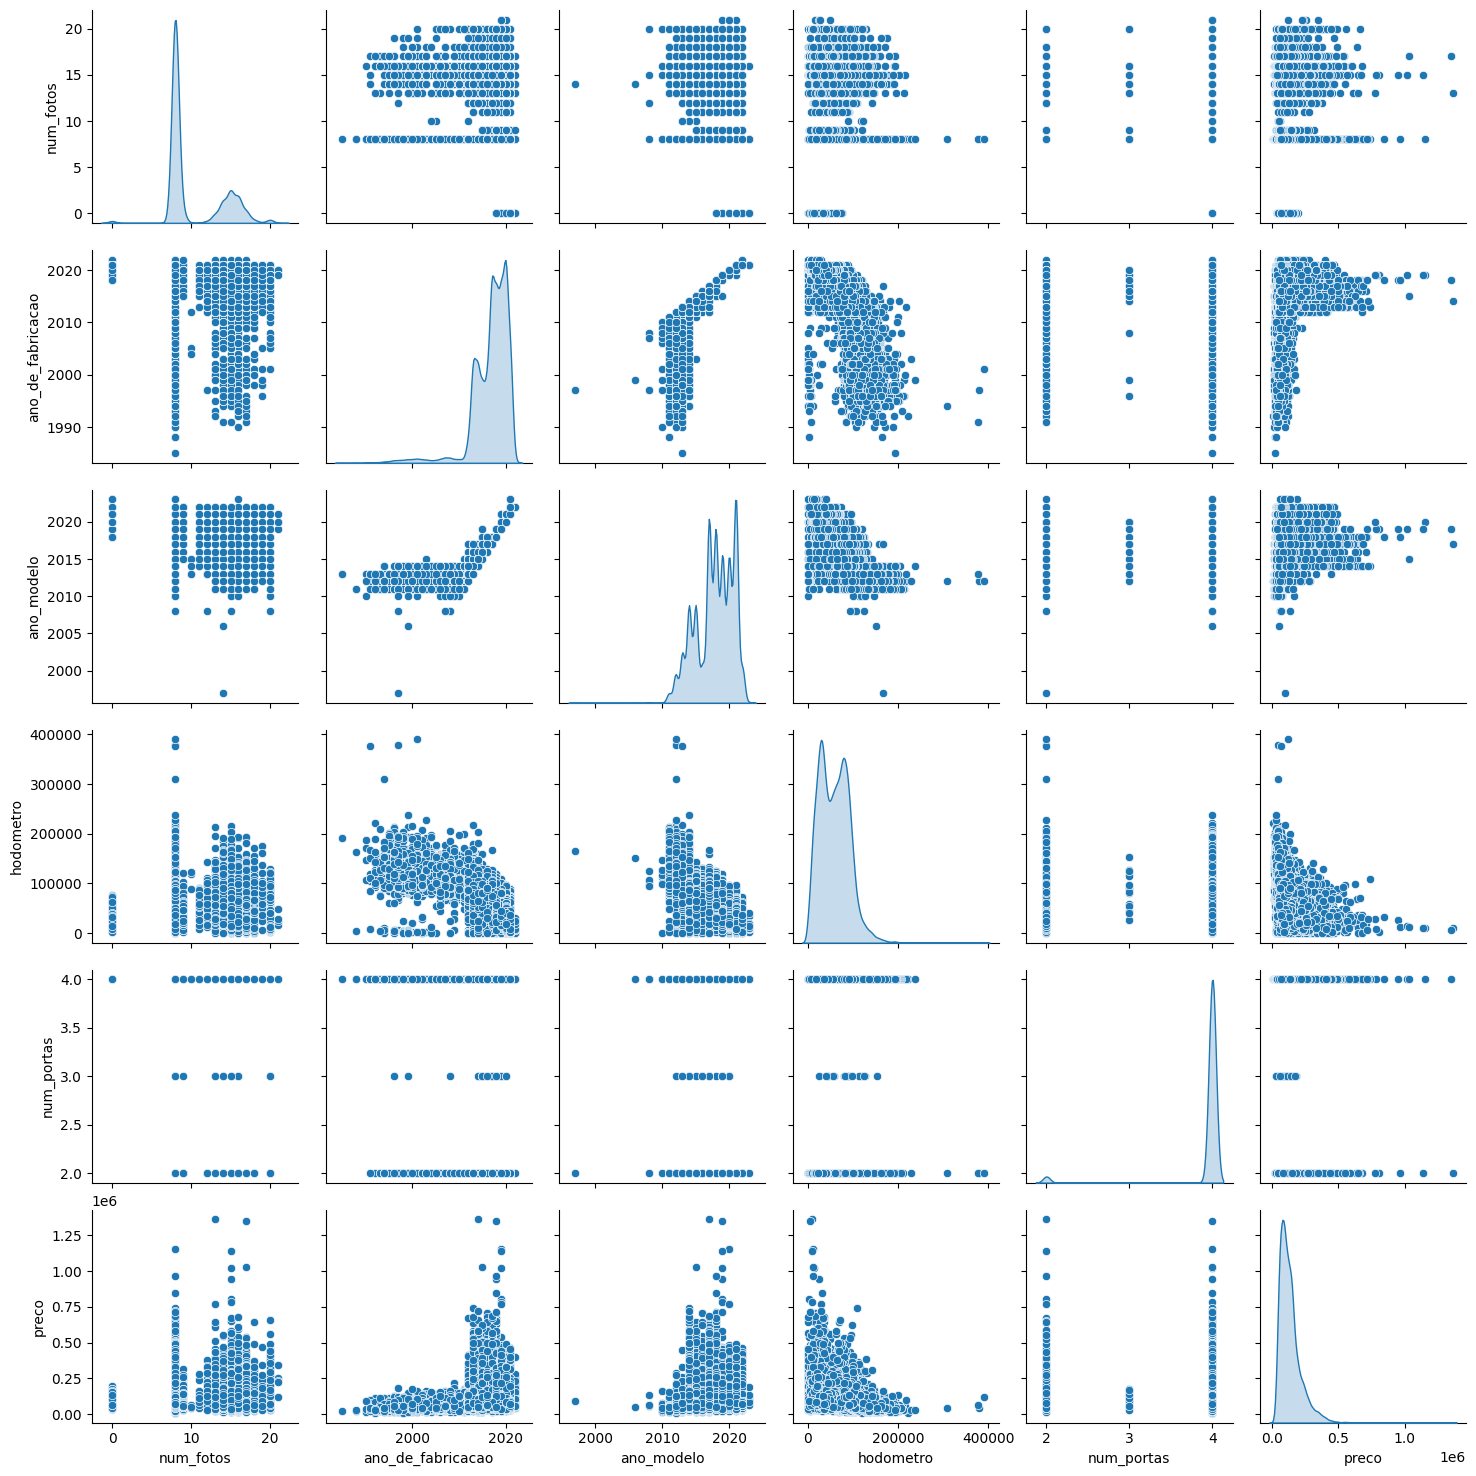

In [7]:
# Joint Distribution
sns.pairplot(data, diag_kind='kde')

All numeric variables correlations can be analyzed in these plots. The most important ones are located in the last row of plots, which correlate `preco` with other features. It is evident that manufacture and model year are directly proportional to the price, while odometer is inversely proportional to the price. These correlations are highly intuitive. The main diagonal shows distributions for each of the numeric features. 

More statistical analysis can be observed below:

In [8]:
# Statistical Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_fotos,29584.0,10.262067,3.566878,0.000000,8.000000,8.000000,14.000000,2.100000e+01
ano_de_fabricacao,29584.0,2016.758552,4.062422,1985.000000,2015.000000,2018.000000,2019.000000,2.022000e+03
ano_modelo,29584.0,2017.808985,2.673930,1997.000000,2016.000000,2018.000000,2020.000000,2.023000e+03
hodometro,29584.0,58430.592077,32561.769309,100.000000,31214.000000,57434.000000,81953.500000,3.900650e+05
num_portas,29584.0,3.940677,0.338360,2.000000,4.000000,4.000000,4.000000,4.000000e+00
preco,29584.0,133023.879880,81662.872247,9869.950645,76571.768462,114355.796998,163679.617425,1.359813e+06


These values can be very useful to make assumptions and improve regression models

## Regression

Before data regression, preprocessing data to prepare the inputs is often recommended.

In this case, a neural network will be used to fit the data. For this purpose, the training process will takes 80% of the data, while the remaining 20% will be used for validation.

In [9]:
train_data = data.copy().sample(frac=0.8,random_state=200) # Training
test_data = data.copy().drop(train_data.index) # Validation

The inputs for this model are tensors with dictionaries of features and a label (target feature). The `shuffle` method was applied to randomly shuffle the elements of the dataset. The `batch` method was also applied. While these are not necessary, they can improve training process or results.

In [10]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop('preco')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

train_ds = dataframe_to_dataset(train_data)
test_ds = dataframe_to_dataset(test_data)

train_ds = train_ds.batch(32)
test_ds = test_ds.batch(32)

Basically, categorical features like `marca` cannot be directly used in a regression analysis because they are not numerical. Even if they are converted into numbers, they do not have the same meaning as a numerical value. For this reason, these features are encoded as unique features that act dichotomously. The encoding method used is <a href="https://keras.io/examples/structured_data/structured_data_classification_with_feature_space/" target="_blank">FeatureSpace</a>, which is a tool to structure data classification.

In [11]:
feature_space = FeatureSpace(
    features={
        # Categorical features encoded as integers
        "ano_de_fabricacao": "integer_categorical",
        "ano_modelo": "integer_categorical",
        # Categorical feature encoded as string
        "marca": "string_categorical",
        "modelo": "string_categorical",
        "versao": "string_categorical",
        "cambio": "string_categorical",
        "tipo": "string_categorical",
        "blindado": "string_categorical",
        "cor": "string_categorical",
        "tipo_vendedor": "string_categorical",
        "cidade_vendedor": "string_categorical",
        "estado_vendedor": "string_categorical",
        "anunciante": "string_categorical",
        "entrega_delivery": "string_categorical",
        "troca": "string_categorical",
        "dono_aceita_troca": "string_categorical",
        "veiculo_unico_dono": "string_categorical",
        "revisoes_concessionaria": "string_categorical",
        "ipva_pago": "string_categorical",
        "veiculo_licenciado": "string_categorical",
        "garantia_de_fabrica": "string_categorical",
        "revisoes_dentro_agenda": "string_categorical",
        "versao": "string_categorical",
        # Numerical features to discretize
        "num_fotos": "float_discretized",
        "num_portas": "float_discretized",
        # Numerical features to normalize
        "hodometro": "float_normalized",
    },
    output_mode="concat",
)

After configuring, it must be adapted

In [16]:
train_ds_with_no_labels = train_ds.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

In [13]:
#for x, _ in train_ds.take(1):
#    preprocessed_x = feature_space(x)
#    print("preprocessed_x.shape:", preprocessed_x.shape)
#    print("preprocessed_x.dtype:", preprocessed_x.dtype)

Both the training and validation inputs must be transformed to match the format required by the models. This can be achieved using the `map` function. Furthermore, it is recommended to enhance computational resources by setting `num_parallel_calls` using `AUTOTUNE`

In [17]:
preprocessed_train_ds = train_ds.map(
    lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_train_ds = preprocessed_train_ds.prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds = test_ds.map(
    lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_val_ds = preprocessed_val_ds.prefetch(tf.data.AUTOTUNE)

The proposed neural network model consists of three dense layers, as shown in the code below.

Due to the nature of this problem, a numerical loss function is required: `mean_absolute_error`.

In [20]:
encoded_features = feature_space.get_encoded_features()

x = keras.layers.Dense(100, activation="relu")(encoded_features)
x = keras.layers.Dense(10)(x)
predictions = keras.layers.Dense(1)(x)

linear_model = keras.Model(inputs=encoded_features, outputs=predictions)

linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
    )

inference_model = keras.Model(inputs=encoded_features, outputs=predictions)

Fitting the model

In [21]:
history = linear_model.fit(
    preprocessed_train_ds,
    epochs=10,
    verbose=2,
    validation_data=preprocessed_val_ds)

Epoch 1/10
740/740 - 4s - loss: 122138.3828 - val_loss: 90249.7969 - 4s/epoch - 5ms/step
Epoch 2/10
740/740 - 3s - loss: 61925.0664 - val_loss: 52867.2383 - 3s/epoch - 4ms/step
Epoch 3/10
740/740 - 3s - loss: 52050.0117 - val_loss: 49529.9805 - 3s/epoch - 4ms/step
Epoch 4/10
740/740 - 3s - loss: 48701.8125 - val_loss: 46251.7773 - 3s/epoch - 4ms/step
Epoch 5/10
740/740 - 3s - loss: 45272.5742 - val_loss: 42859.6758 - 3s/epoch - 4ms/step
Epoch 6/10
740/740 - 3s - loss: 41807.9453 - val_loss: 39590.6680 - 3s/epoch - 4ms/step
Epoch 7/10
740/740 - 3s - loss: 38644.9023 - val_loss: 36885.7148 - 3s/epoch - 4ms/step
Epoch 8/10
740/740 - 3s - loss: 36132.6133 - val_loss: 34881.7891 - 3s/epoch - 4ms/step
Epoch 9/10
740/740 - 3s - loss: 34338.0664 - val_loss: 33543.5273 - 3s/epoch - 4ms/step
Epoch 10/10
740/740 - 3s - loss: 33077.0312 - val_loss: 32620.6055 - 3s/epoch - 4ms/step


## Results

The code below generates a plot depicting the history of the fitting process, where `loss` represents the loss function value for the training dataset, and `val_loss` represents the loss function for the validation dataset

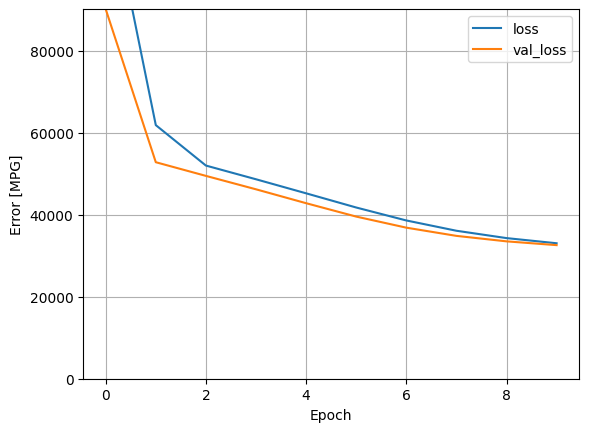

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['val_loss'])])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

It is desired that `loss` and `val_loss` are minimized, hence, improving predictions. It can be observed that the loss function values decrease as the number of `epochs` increases.

Now, an essential step is to assess the prediction results. For this purpose, a histogram plot of residuals can provide valuable information. Residuals are the diferences between the observed value (`y_train`) and the predicted value (`y_pred`). To simplify the analysis, the residuals can be normalized by dividing them by the corresponding obeserved value, resulting in a percentage variation.

To perform this analysis, it is necessary to run the `predict` method to obtain the individual predicted values, as the `loss` function is the mean of these values. 

In [23]:
def dataframe_to_prediction_input(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop('preco')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.batch(len(ds))
    for x, _ in ds.take(1):
        preprocessed_x = feature_space(x)
    return preprocessed_x, labels

pred_data, y_train = dataframe_to_prediction_input(data)
predictions = inference_model.predict(pred_data)

y_pred = inference_model.predict(pred_data)

925/925 [==============================] - 1s 892us/step


The histogram plot:

Mean:  -0.07026508204743988
Variance:  0.14120804539089965


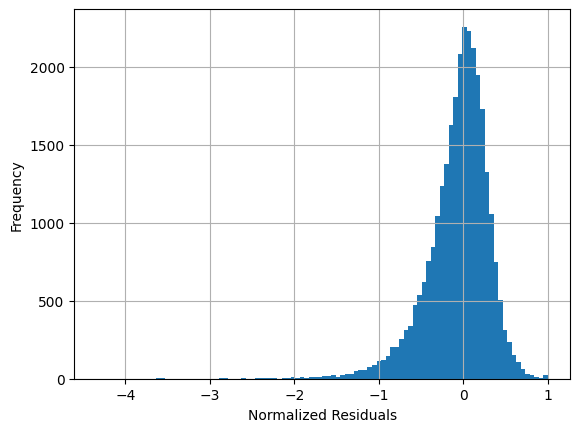

In [24]:
y_train = np.array(y_train)
y_pred = np.reshape(y_pred, (len(y_pred)))
residuals = (y_train - y_pred)/y_train

def plot_residuals(residuals):
  plt.hist(residuals, bins=100)
  plt.xlabel('Normalized Residuals')
  plt.ylabel('Frequency')
  plt.grid(True)

plot_residuals(residuals)
print('Mean: ', np.mean(residuals))
print('Variance: ', np.var(residuals))

The histogram plot displays the residuals distribution. With a mean close to zero, -0.07 and a variance around 0.13. This regression model performs quite well given its simplicity. However, there is a clear bias in the predictions, as they tend to overestimate the price of the cars

## Predicting

Finally, in order to predict the test data, it is necessary to repeat all the previous steps of cleaning and preprocessing for this new data.

In [50]:
test_ = pd.read_csv(r'cars_test.csv', encoding = 'UTF-16 LE', sep='\t')

# Rename columns
test_.rename(columns={'veiculo_único_dono': 'veiculo_unico_dono', 'garantia_de_fábrica': 'garantia_de_fabrica'}, inplace=True)

# Fill empty columns
# Numeric columns
test_['num_fotos'] = test_['num_fotos'].fillna(0)
# String columns
test_[['dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica', 'revisoes_dentro_agenda', 'veiculo_alienado']] = test_[['dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica', 'revisoes_dentro_agenda', 'veiculo_alienado']].fillna('Nao')

# Change boolean types to string
test_[['entrega_delivery','troca','elegivel_revisao']] = test_[['entrega_delivery','troca','elegivel_revisao']].astype('string')


# Remove univariate feature
def drop_univariate_feature_pred(df):
    unique_counts = df.nunique()
    columns_to_drop = unique_counts[unique_counts == 1].index
    df = df.drop(columns_to_drop, axis=1)
    return df

test_ = drop_univariate_feature_pred(test_)

def dataframe_to_prediction(dataframe):
    dataframe = dataframe.copy()
    id = dataframe.pop('id')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe),id))
    ds = ds.batch(len(ds))
    for x, _ in ds.take(1):
        preprocessed_x = feature_space(x)
    return preprocessed_x, id

pred_data, id = dataframe_to_prediction(test_)


y_pred = inference_model.predict(pred_data)

id = pd.Series(id)
y_pred = pd.Series(y_pred.flatten())

predicted = pd.concat([id,y_pred], axis=1)
predicted.to_csv(r'predicted.csv', index=False)

309/309 [==============================] - 0s 1ms/step
